# What can we learn about the Climate from Global Average Surface Temperature?
In this session we'll investigate the global average of surface temperature to start learning about Earth's climate system.

## Review Assignments

We'll always try to set aside the first 15-20 minutes of time together to review the work everyone has done outside of class.

[space for notes on student's work]

## Earth's Global Average Surface Temperature, a key climate indicator (1850-2023)
The average temperature of the surface of the Earth is a powerful tool for quantifying Earth's climate and has profound impacts on human, biological, and physical systems. So what sets the mean surface temperature of the Earth?

Let's start by looking at [a record of Earth's average surface temperature](https://berkeleyearth.org/data/) to see what the recent climate has looked like.

In [4]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [5]:
# load data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)

FileNotFoundError: [Errno 2] No such file or directory: '../data/GAST_BerkeleyEarth_1850-2023.csv'

In [ ]:
gast

We'll add a datetime column to make using Pandas a little easier

In [ ]:
gast['Time'] = pd.to_datetime(gast[['Year','Month']].assign(Day=1))

In [ ]:
df = gast.set_index('Time')[['Monthly Average','Monthly Anomaly Uncertainty']]

In [ ]:
df

The dataframe `df` now holds the **time series** of monthly averaged global average surface temperature of Earth. A **time series** is a series of values of a quantity obtained at successive times, often with equal intervals between them.

For data that was sampled evenly in time, we can describe how frequently a sample was made by the number of point over a given period of time. In our example there is one data point for each month, so we'd say the GAST is at monthly frequency.

**Plot the time series of the monthly averaged global average surface temperature of Earth.**

In [6]:
# plot the monthly average gast
plt.plot(df.index,df['Monthly Average'])
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.grid()
plt.show()

NameError: name 'df' is not defined

What do you notice?

* It looks like a blob
* Temperature looks lower in the 1850-1860 but starts to increase in the 1900's

Why does looking at the record like a blob? Let's start by zooming in on only a small portion of the line plot to see what's going on.

In [ ]:
# zoomed in plot the monthly average gast
plt.plot(df.index,df['Monthly Average'])
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.xlim([datetime.date(1850,1,1), datetime.date(1860, 1, 1)])
plt.grid()
plt.show()

Now we can see that the blob is really a single line that goes up and down every year. That up and down cycling is a natural process and we refer to that as a seasonal cycle.

What do you notice about the seasonal cycle in this time series?

[notes on your observations here]

## [Taking Averages](https://earth-env-data-science.github.io/lectures/pandas/pandas_groupby.html#time-grouping)
Averaging data allows us to take complex signals and reduce the information into something more digestable. There are all sorts of way to take averages, here will look at **rolling averages** and **grouped averages**.

### Rolling Average
A rolling average is a calculation to analyze data points by creating a series of averages of different selections of the full data set. It is a way of smoothing a signal so the background variations are easier to see rather than the short time variations (some times called the noise).

Let's look at the full GAST with the rolling average plotted on top. Here we'll tell pandas that we want the rolling average to be of 12 data points and to place the average at the center of the 12 selected points. For this monthly dataset, that means each point in the rolling average is a year's worth of data.

In [ ]:
# plot the monthly average gast with rolling average
monthly_avg = df['Monthly Average']  # Extract the 'Monthly Average' column from the dataframe
n_points = len(monthly_avg)  # Get the number of data points

dates = []  # Initialize an empty list to store the dates
rolling_avgs = []  # Initialize an empty list to store the rolling averages

for i in range(0, n_points-12, 12):  # Iterate over the data points in 12-month windows
    dates.append(df.index[i+6])  # Add the date at the center of the window to the 'dates' list
    rolling_avg = monthly_avg[i:i+12].mean()  # Calculate the average of the 12-month window
    rolling_avgs.append(rolling_avg)  # Add the rolling average to the 'rolling_avgs' list

# Plot the rolling averages
plt.plot(dates, rolling_avgs)
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.grid()
plt.show()

In [ ]:
# plot the monthly average gast with rolling average and zooming in
# zoomed in plot the monthly average gast
plt.plot(dates,rolling_avgs)
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time [Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.xlim([datetime.date(1850,1,1), datetime.date(1860, 1, 1)])
plt.grid()
plt.show()

### Grouped Averages
A grouped averaged is where you breakup data set into groups and take the average of each group and the respective indecies, here time, of the group. This chages the frequency of the data set.

For this example we want to go from GAST at monthly frequency down to yearly or annual frequency, so we want to group our data into years, where we take the average of all the data points in a given year. Pandas has two ways to do that, and we'll look at both. The first is with the function `resample`.

In [ ]:
# plot the monthly average gast with annual average with resample

In [ ]:
# plot the monthly average gast with annual average with resample and zoom

The advantage of using resample here is that is preserves the index as a datetime object.

The other function for grouped averages is `groupby`. `groupby` is very flexible, but doesn't preserve the index as a datetime object. This makes plotting the averaged data with the original a little more tricky but can be worked around. Let's see what that looks like though.

## Assignment

I've added a second data set to the data folder. It's just like the global average surface temperature, but it **only** includes the surface temperature on land in the average and extends back to 1750!

Visualize, in your own way, **both** global average surface temperature time series, land only and full globe, to see how the Earth's climate has evolved over the 1750-2023 time period. Remember that climate refers to a long-term average, usually over 30 years in length. You may chose to do this with line plots, histograms, bar charts. You may chose to make annual averages of each time series first or use the monthly averages dataset, or both. Add notes about why you chose your particular visualization. What differences do you see in the two data sets? What might cause these difference? Include your ideas and questions in your notes.

In [1]:
# path and file name for the land only version of GAST
fname_land_only_gast = '../data/Land-Only_GAST_BerkeleyEarth_1750-2023.csv'

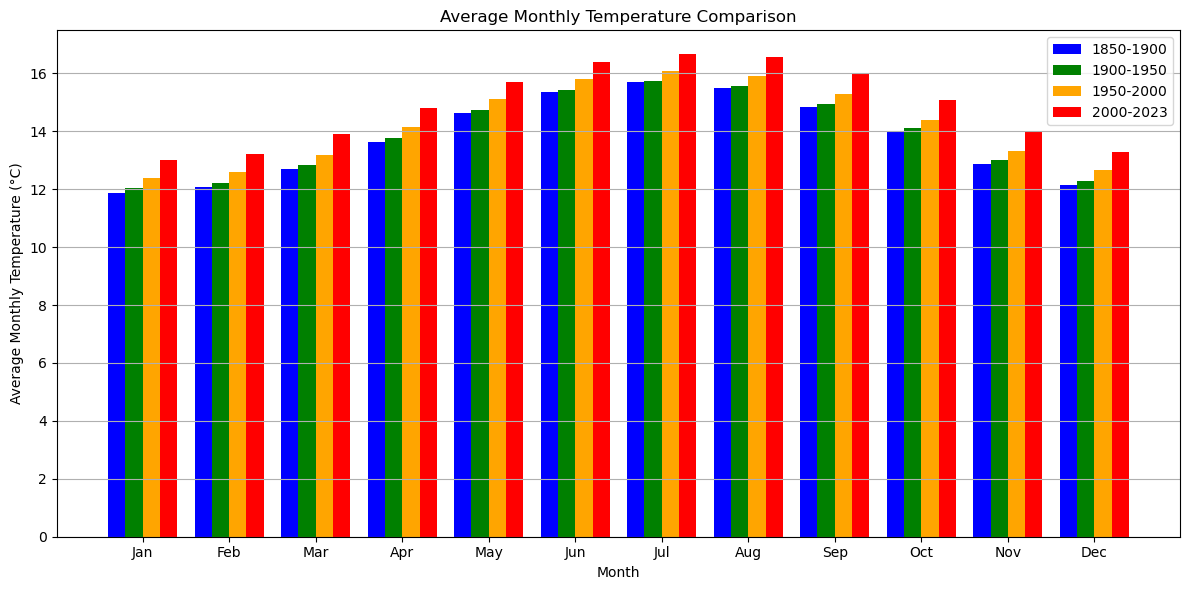

Average Monthly Temperatures:
1850-1899:
Month
1     11.86318
2     12.05942
3     12.69002
4     13.63040
5     14.63388
6     15.37314
7     15.71588
8     15.50758
9     14.84366
10    13.96862
11    12.85648
12    12.14510
Name: Monthly Average, dtype: float64
1900-1949:
Month
1     12.02862
2     12.22072
3     12.84636
4     13.78208
5     14.72914
6     15.42614
7     15.72578
8     15.56688
9     14.95552
10    14.11570
11    13.01978
12    12.28794
Name: Monthly Average, dtype: float64
1950-1999:
Month
1     12.39030
2     12.59566
3     13.19382
4     14.15510
5     15.11216
6     15.82182
7     16.07218
8     15.91978
9     15.30392
10    14.37316
11    13.30988
12    12.66054
Name: Monthly Average, dtype: float64
2000-2023:
Month
1     13.025333
2     13.221667
3     13.908000
4     14.813542
5     15.713833
6     16.381375
7     16.653958
8     16.559500
9     15.986417
10    15.077083
11    14.019333
12    13.299542
Name: Monthly Average, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load and preprocess the data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)
# Function to plot bar chart of average monthly temperatures for different time periods
def plot_monthly_comparison(gast):
    # Filter data for each time period
    gast_1850_1900 = gast[(gast['Year'] >= 1850) & (gast['Year'] < 1900)]
    gast_1900_1950 = gast[(gast['Year'] >= 1900) & (gast['Year'] < 1950)]
    gast_1950_2000 = gast[(gast['Year'] >= 1950) & (gast['Year'] < 2000)]
    gast_2000_2023 = gast[(gast['Year'] >= 2000) & (gast['Year'] <= 2023)]
    # Calculate average monthly temperatures for each time period
    monthly_means_1850_1900 = gast_1850_1900.groupby('Month')['Monthly Average'].mean()
    monthly_means_1900_1950 = gast_1900_1950.groupby('Month')['Monthly Average'].mean()
    monthly_means_1950_2000 = gast_1950_2000.groupby('Month')['Monthly Average'].mean()
    monthly_means_2000_2023 = gast_2000_2023.groupby('Month')['Monthly Average'].mean()
    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    # Plotting each time period with different colors
    plt.bar(monthly_means_1850_1900.index - 0.3, monthly_means_1850_1900.values, width=0.2, color='blue', label='1850-1900')
    plt.bar(monthly_means_1900_1950.index - 0.1, monthly_means_1900_1950.values, width=0.2, color='green', label='1900-1950')
    plt.bar(monthly_means_1950_2000.index + 0.1, monthly_means_1950_2000.values, width=0.2, color='orange', label='1950-2000')
    plt.bar(monthly_means_2000_2023.index + 0.3, monthly_means_2000_2023.values, width=0.2, color='red', label='2000-2023')
    # Customizing the plot
    plt.title('Average Monthly Temperature Comparison')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Temperature (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    # i had this in before plot the bar chart  
    print("Average Monthly Temperatures:")
    print(f"1850-1899:\n{monthly_means_1850_1900}")
    print(f"1900-1949:\n{monthly_means_1900_1950}")
    print(f"1950-1999:\n{monthly_means_1950_2000}")
    print(f"2000-2023:\n{monthly_means_2000_2023}")

# Example: Plotting the comparison for all time periods
plot_monthly_comparison(gast)



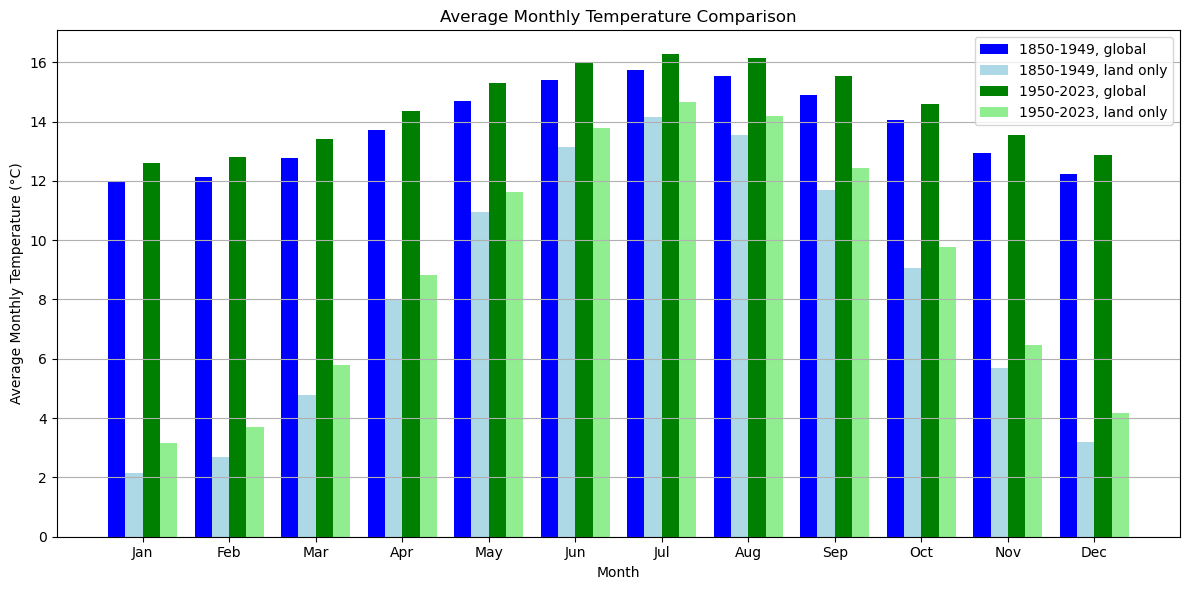

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Load and preprocess the data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)

land_data = "../data/Land-Only_GAST_BerkeleyEarth_1750-2023.csv"
land_only = pd.read_csv(land_data)

# Function to plot bar chart of average monthly temperatures for different time periods
def plot_monthly_comparison(gast):
    # Filter data for each time period
    gast_1850_1949 = gast[(gast['Year'] >= 1850) & (gast['Year'] < 1950)]
    gast_1950_2023 = gast[(gast['Year'] >= 1950) & (gast['Year'] <= 2023)]
    
    land_only_1850_1949 = land_only[(land_only['Year'] >= 1850) & (land_only['Year'] < 1950)]
    land_only_1950_2023 = land_only[(land_only['Year'] >= 1950) & (land_only['Year'] <= 2023)]

    # Calculate average monthly temperatures for each time period
    monthly_means_1850_1949 = gast_1850_1949.groupby('Month')['Monthly Average'].mean()
    monthly_means_1950_2023 = gast_1950_2023.groupby('Month')['Monthly Average'].mean()
    
    land_only_monthly_means_1850_1949 = land_only_1850_1949.groupby('Month')['Monthly Average'].mean()
    land_only_monthly_means_1950_2023 = land_only_1950_2023.groupby('Month')['Monthly Average'].mean()

    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    # Plotting each time period with different colors
    plt.bar(monthly_means_1850_1949.index - 0.3, monthly_means_1850_1949.values, width=0.2, color='blue', label='1850-1949, global')
    plt.bar(land_only_monthly_means_1850_1949.index - 0.1, land_only_monthly_means_1850_1949.values, width=0.2, color='lightblue', label='1850-1949, land only')
    plt.bar(monthly_means_1950_2023.index + 0.1, monthly_means_1950_2023.values, width=0.2, color='green', label='1950-2023, global')
    plt.bar(land_only_monthly_means_1950_2023.index + 0.3, land_only_monthly_means_1950_2023.values, width=0.2, color='lightgreen', label='1950-2023, land only')
    # Customizing the plot
    plt.title('Average Monthly Temperature Comparison')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Temperature (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example: Plotting the comparison for all time periods
plot_monthly_comparison(gast)



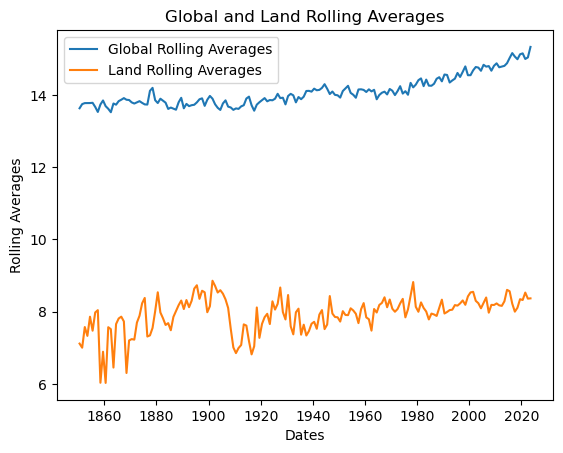

In [5]:
# rolling average 1850-2023 of global and land-only annual temperature
import matplotlib.pyplot as plt

global_file = '../data/GAST_BerkeleyEarth_1850-2023.csv'
global_data = pd.read_csv(global_file)
global_data['Time'] = pd.to_datetime(global_data[['Year','Month']].assign(Day=1)) # add a time column

land_file = "../data/Land-Only_GAST_BerkeleyEarth_1750-2023.csv"
land_data = pd.read_csv(land_file)
land_data['Time'] = pd.to_datetime(land_data[['Year','Month']].assign(Day=1)) # add a time column

# filter data for 1850 onwards
global_data = global_data[global_data['Year'] >= 1850]
land_data = land_data[land_data['Year'] >= 1850]

# set indices to I can get the dates correctly
global_data = global_data.set_index('Time')[['Monthly Average','Monthly Anomaly Uncertainty']]
land_data = land_data.set_index('Time')[['Monthly Average','Monthly Anomaly Uncertainty']]

# Splitting global data into 12-month windows and taking the mean of each window
global_rolling_avgs = []
global_dates = []
for i in range(0, len(global_data)-11, 12):
    date = global_data.index[i+6]
    global_dates.append(date)
    window = gast['Monthly Average'][i:i+12]
    window_mean = window.mean()
    global_rolling_avgs.append(window_mean)

# Splitting land data into 12-month windows and taking the mean of each window
land_rolling_avgs = []
land_dates = []
for i in range(0, len(land_data)-11, 12):
    date = land_data.index[i+6]
    land_dates.append(date)
    window = land_only['Monthly Average'][i:i+12]
    window_mean = window.mean()
    land_rolling_avgs.append(window_mean)


plt.plot(global_dates, global_rolling_avgs, label='Global Rolling Averages')
plt.plot(land_dates, land_rolling_avgs, label='Land Rolling Averages')
plt.xlabel('Dates')
plt.ylabel('Rolling Averages')
plt.title('Global and Land Rolling Averages')
plt.legend()
plt.show()